In [291]:
import requests
from bs4 import BeautifulSoup
import tokenize
from io import StringIO
import builtins

keywords = ['False', 'None', 'True', 'and', 'as', 'assert', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']
keywords = keywords+dir(builtins)
def get_maintext(text1):
    newlis = []

    comment_flag = False

    maintext = []

    for i in text1:
        str1 = []
        if(i.startswith('+') and not i.startswith('+++')):
            if(not i[1:].strip().startswith("#") and not i[1:].strip().startswith("//")):
                if("/*" in i[1:].strip() or "\"\"\"" in i[1:].strip()):
                    comment_flag = True
                if("*/" in  i[1:].strip() or "\"\"\"" in i[1:].strip()):
                    comment_flag = False
                    continue
                if(comment_flag):
                    continue
                tempor = i[1:].strip()
                try:
                    g = tokenize.generate_tokens(StringIO(tempor).readline)
                    for token in g:
                        if(token[1] in keywords):
                            str1.append(token[1])
                        elif('ENDMARKER' not in str(tokenize.tok_name[token[0]]) or 'NEWLINE' not in str(tokenize.tok_name[token[0]])):
                            str1.append(tokenize.tok_name[token[0]])
                except:
                    continue
        if(str1!=[]):
            maintext.append(" ".join(str1))

    return "\n".join(maintext)


url1 = "https://github.com/tensorflow/tensorflow/pulls/"

page1=requests.get(url1)
soup1 = BeautifulSoup(page1.text, 'html.parser')
d = soup1.findAll(class_ = "link-gray-dark")

lis1 = []
lis2 = []

pr_tokenized = []

for i in d:
    if("pull" in i['href']):
        try:
            pull_number = i["id"][6:-5]
            pull_text = i.contents
            lis2.append((pull_text, pull_number))
            url = "https://patch-diff.githubusercontent.com/raw"+str(i["href"])+".patch"
            page=requests.get(url)
            soup = BeautifulSoup(page.text, 'html.parser')
            text = soup.findAll()
            text1 = str(text).split("\n")
            pr_tokenized.append(get_maintext(text1))
        except:
            print("err")

In [292]:
pr_hashes = []

for i in pr_tokenized:
    pr_hashes.append(hash(i))
final_data = {}

for i in range(len(lis2)):
    final_data[i] = {"prnumber":lis2[i][1],"text":lis2[i][0],"hash_value":pr_hashes[i]}


In [293]:
final_list = sorted(final_data.items(), key = lambda x:x[1]['hash_value'])

In [287]:
final_list

[(14,
  {'prnumber': '11241',
   'text': ['Fixed #21080 -- Ignored urls inside static files comments.'],
   'hash_value': 324}),
 (4,
  {'prnumber': '11262',
   'text': ['minor corrections in docstring'],
   'hash_value': 1801}),
 (22,
  {'prnumber': '11221',
   'text': ["#28357 -- Prepopulated_fields doesn't work for admin.StackedInline"],
   'hash_value': 1801}),
 (19,
  {'prnumber': '11224',
   'text': ['Fixed #23004 -- Hid sensitive environment parameters in debug view'],
   'hash_value': 4256}),
 (17,
  {'prnumber': '11227', 'text': ['WIP Ticket #29607'], 'hash_value': 10033}),
 (13,
  {'prnumber': '11244',
   'text': ['Fixes #30342 -- Made it clear that LANGUAGES_BIDI may contain language codes not in LANGUAGES'],
   'hash_value': 13648}),
 (10,
  {'prnumber': '11249',
   'text': ['More accurate terminology ("logger" instead of "logging handler") in logging documentation.'],
   'hash_value': 14990}),
 (12,
  {'prnumber': '11245',
   'text': ['Fixed #26678 -- Documented primary ke

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer()

sparse_matrix = count_vectorizer.fit_transform(pr_tokenized)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix)

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

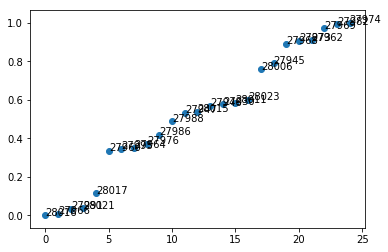

In [294]:
# clusters based on hash values:
import matplotlib.pyplot as plt
import numpy as np

normalized = []
labels = []

for i in final_list:
    normalized.append(i[1]['hash_value'])
    labels.append(i[1]['prnumber'])

normalized = np.array(normalized)
y = (normalized-min(normalized))/(max(normalized)-min(normalized))
x = [i for i in range(len(y))]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

# we can see three clusters based on the hash values

In [ ]:
# based on the cosine similarity of the parsed code


